# Analyse univarié

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Importation du jeu de données nettoyé
df = pd.read_csv('../data/creditcard_clean.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

### Distribution simples

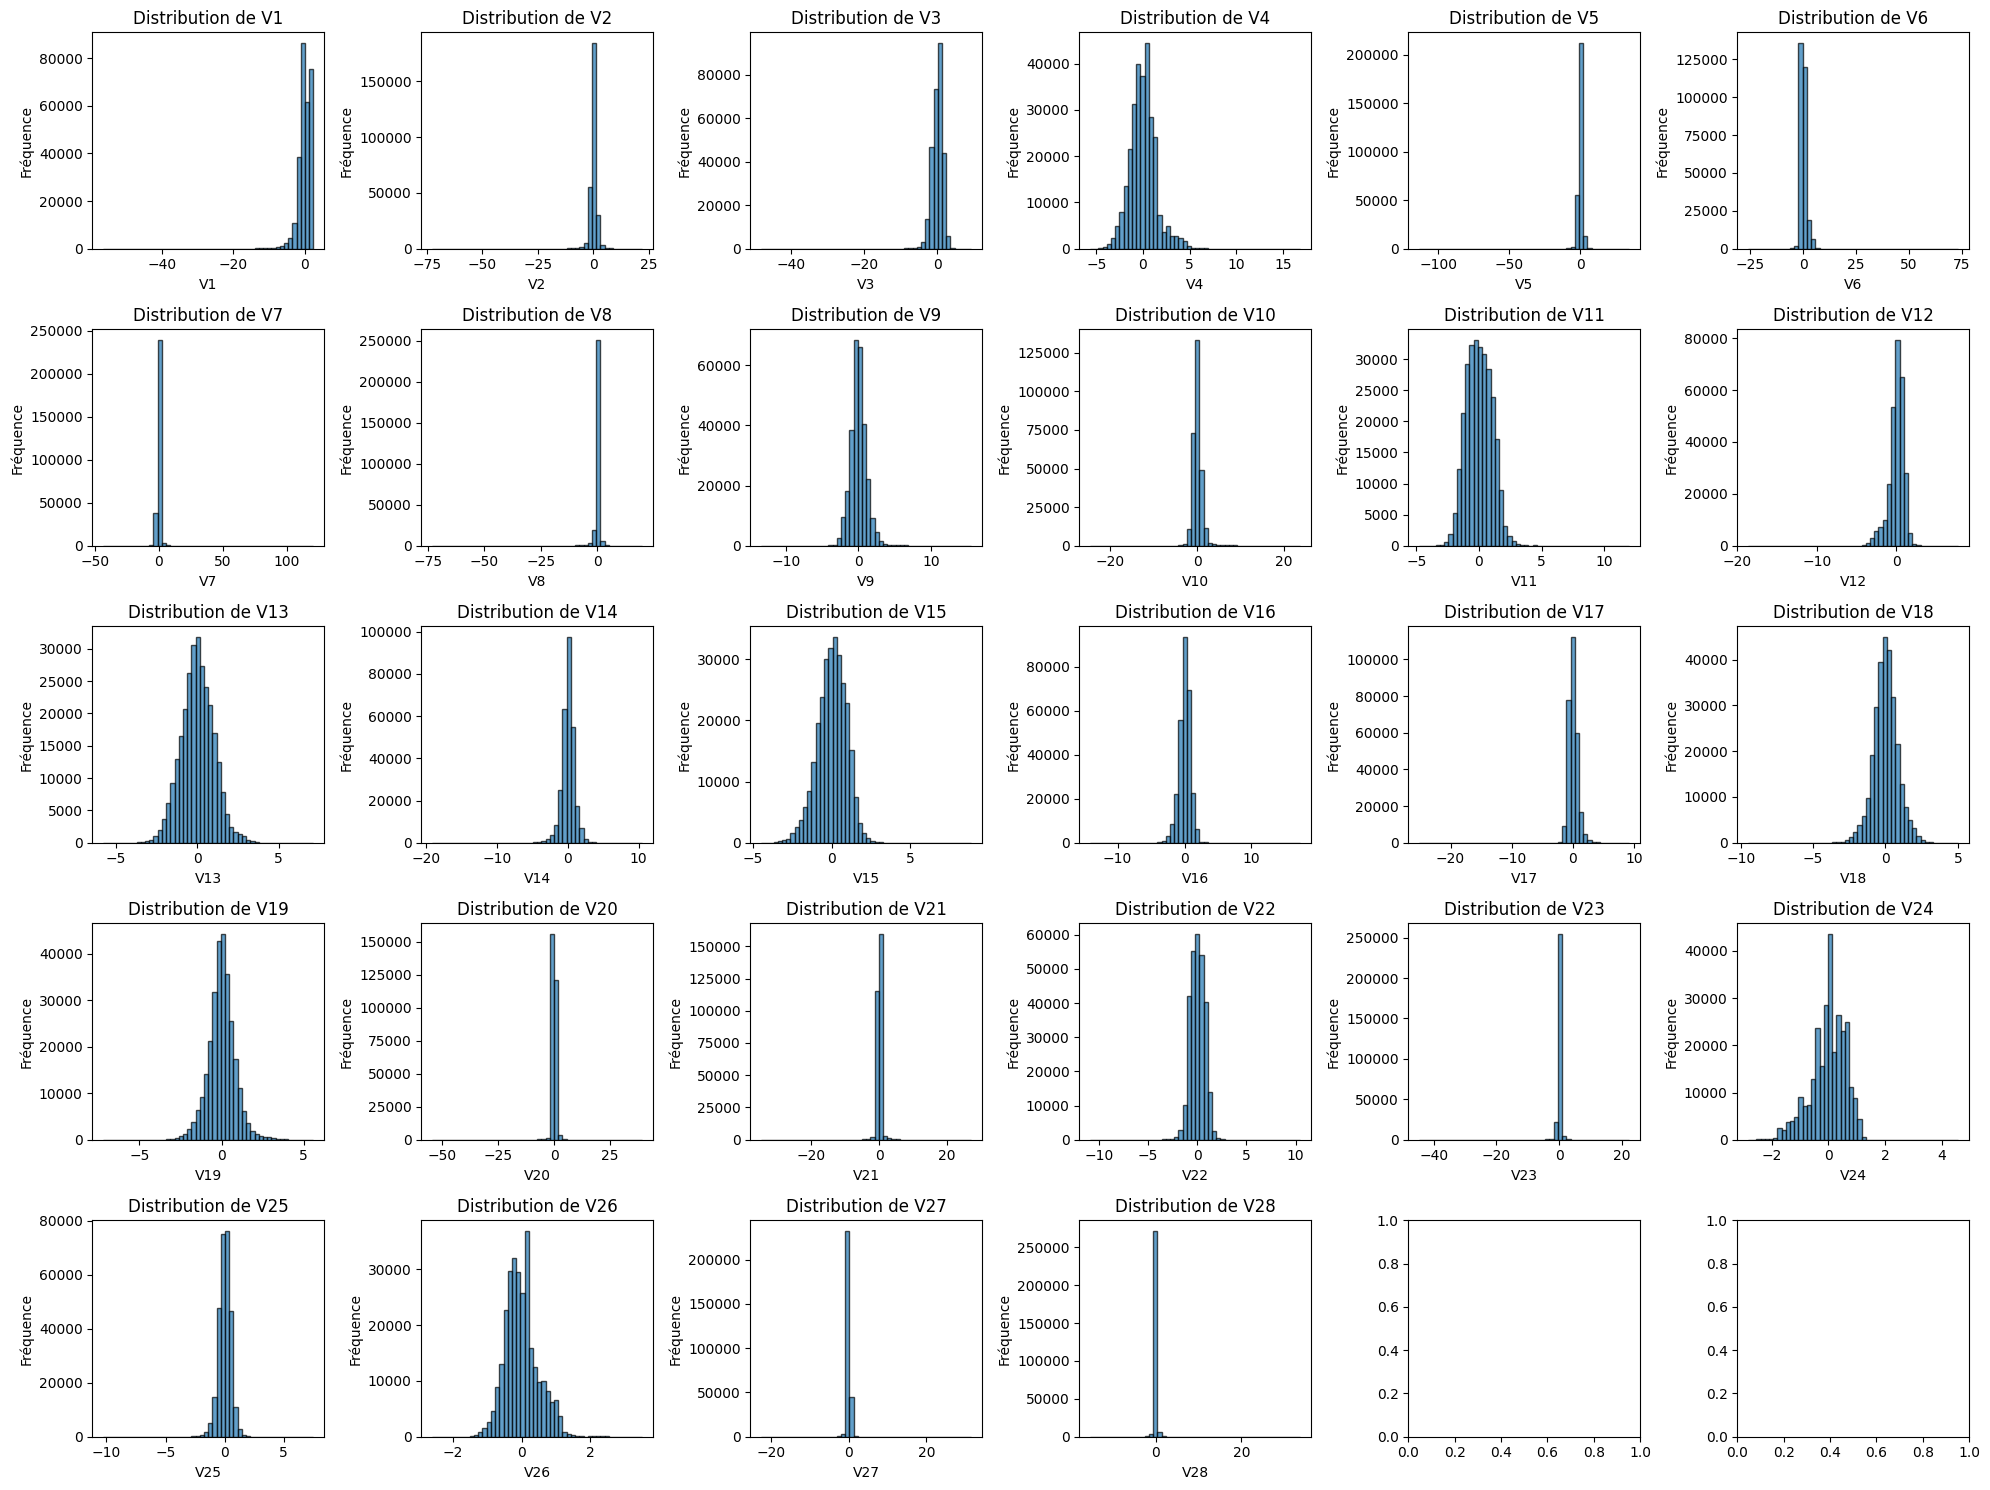

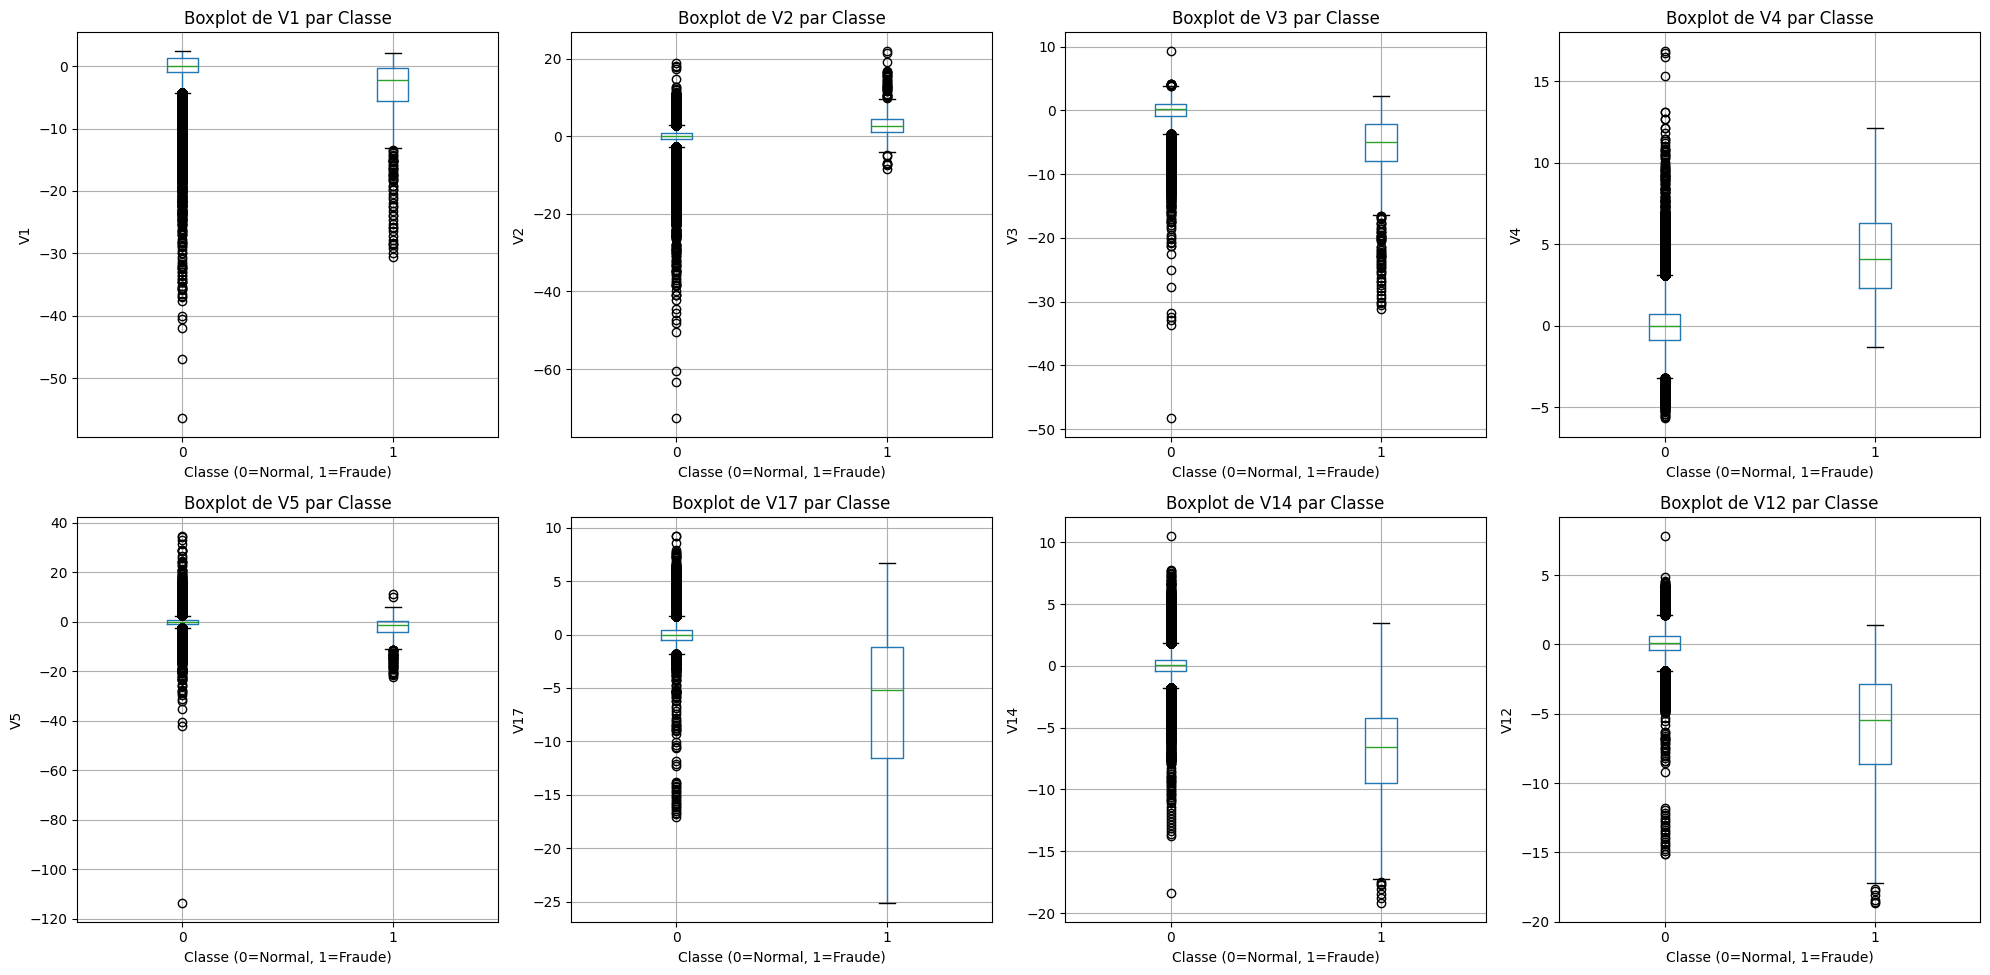

STATISTIQUES DESCRIPTIVES
                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%    

In [ ]:
# Histogrammes pour les variables V1 à V27
fig, axes = plt.subplots(5, 6, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate([c for c in df.columns if c.startswith('V')]):
    axes[i].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

plt.tight_layout()
plt.savefig('histogrammes_variables.png', dpi=300, bbox_inches='tight')
plt.show()

# Boxplots comparant Normal vs Fraude pour quelques variables
variables_a_analyser = ['V1', 'V2', 'V3', 'V4', 'V5', 'V17', 'V14', 'V12']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(variables_a_analyser):
    df.boxplot(column=col, by='Class', ax=axes[i])
    axes[i].set_title(f'Boxplot de {col} par Classe')
    axes[i].set_xlabel('Classe (0=Normal, 1=Fraude)')
    axes[i].set_ylabel(col)

plt.suptitle('')
plt.tight_layout()
plt.savefig('boxplots_par_classe.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistiques descriptives
print("=" * 80)
print("STATISTIQUES DESCRIPTIVES")
print("=" * 80)
print(df.describe())
print("\n")



### Analyse temporelle

In [ ]:
# Convertir Time en heures
df['Time_hours'] = df['Time'] / 3600

# Distribution des transactions dans le temps
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Time_hours'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
plt.title('Distribution Temporelle des Transactions')
plt.xlabel('Temps (heures)')
plt.ylabel('Nombre de transactions')

# Transactions par heure selon la classe
plt.subplot(1, 2, 2)
df[df['Class'] == 0]['Time_hours'].hist(bins=50, alpha=0.7, label='Normal', color='green')
df[df['Class'] == 1]['Time_hours'].hist(bins=50, alpha=0.7, label='Fraude', color='red')
plt.title('Distribution Temporelle par Classe')
plt.xlabel('Temps (heures)')
plt.ylabel('Nombre de transactions')
plt.legend()

plt.tight_layout()
plt.savefig('analyse_temporelle.png', dpi=300, bbox_inches='tight')
plt.show()

# Transactions par période de la journée
df['Time_period'] = pd.cut(df['Time_hours'], 
                           bins=[0, 6, 12, 18, 24, 48], 
                           labels=['Nuit (0-6h)', 'Matin (6-12h)', 'Après-midi (12-18h)', 'Soir (18-24h)', 'Jour 2'])

periode_stats = pd.crosstab(df['Time_period'], df['Class'], normalize='index') * 100
print("=" * 80)
print("POURCENTAGE DE FRAUDES PAR PÉRIODE")
print("=" * 80)
print(periode_stats)
print("\n")

### Analyse univariée de la variable 'Amount'

NameError: name 'np' is not defined

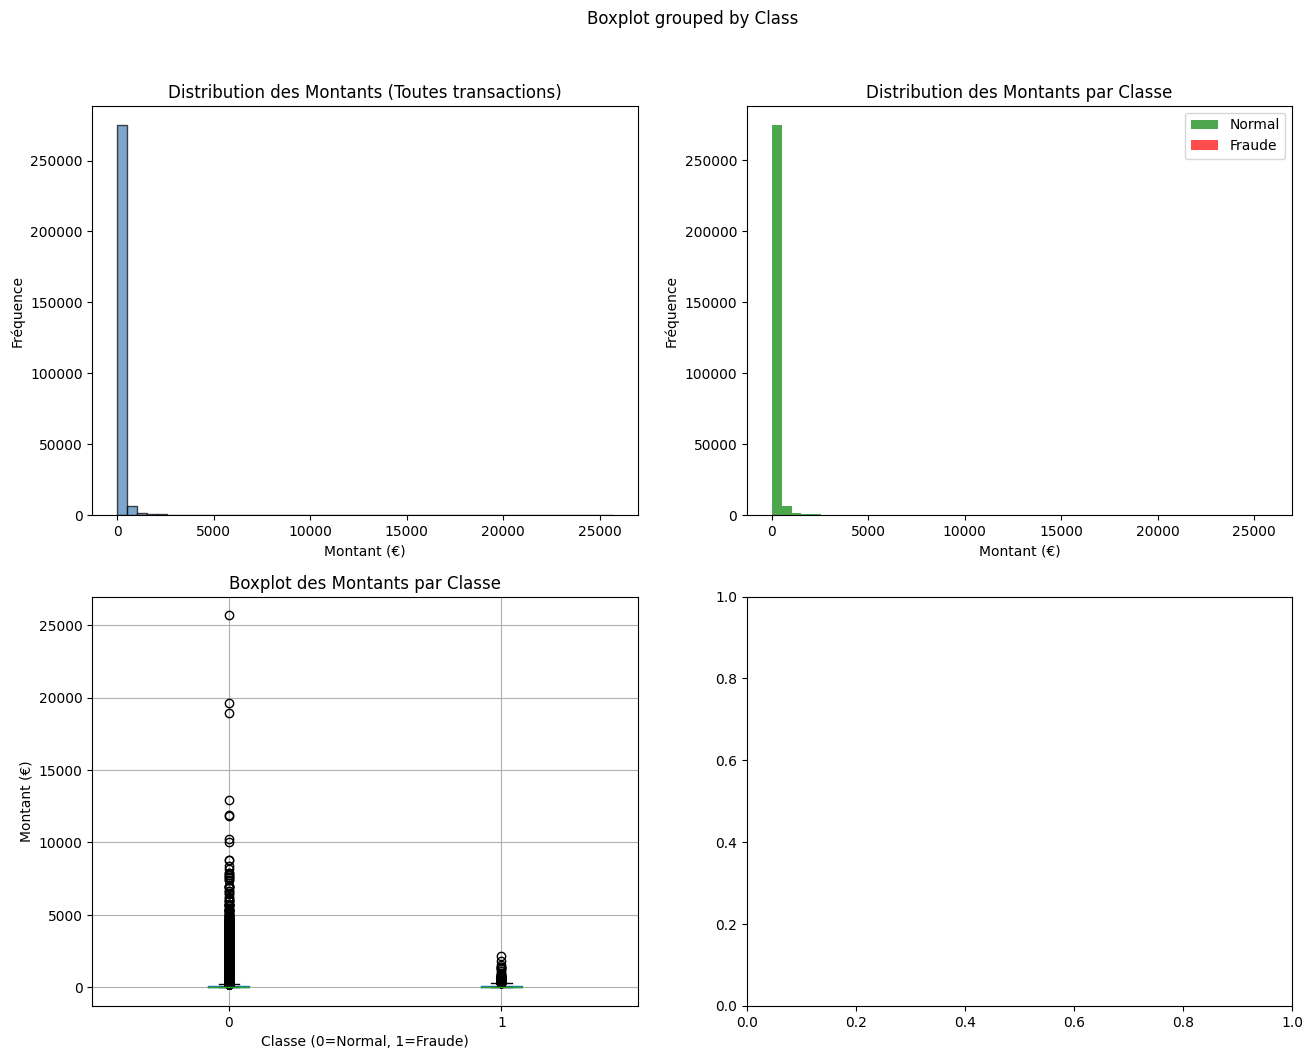

In [13]:
# Vérifier si la colonne Amount existe
if 'Amount' in df.columns:
    # Distribution des montants
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Histogramme général
    axes[0, 0].hist(df['Amount'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0, 0].set_title('Distribution des Montants (Toutes transactions)')
    axes[0, 0].set_xlabel('Montant (€)')
    axes[0, 0].set_ylabel('Fréquence')
    
    # Histogramme par classe
    axes[0, 1].hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.7, label='Normal', color='green')
    axes[0, 1].hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.7, label='Fraude', color='red')
    axes[0, 1].set_title('Distribution des Montants par Classe')
    axes[0, 1].set_xlabel('Montant (€)')
    axes[0, 1].set_ylabel('Fréquence')
    axes[0, 1].legend()
    
    # Boxplot par classe
    df.boxplot(column='Amount', by='Class', ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot des Montants par Classe')
    axes[1, 0].set_xlabel('Classe (0=Normal, 1=Fraude)')
    axes[1, 0].set_ylabel('Montant (€)')
    
    # Distribution log des montants (pour mieux voir)
    df_with_amount = df[df['Amount'] > 0].copy()
    axes[1, 1].hist(np.log10(df_with_amount['Amount']), bins=50, edgecolor='black', alpha=0.7)
    axes[1, 1].set_title('Distribution Log10 des Montants (>0)')
    axes[1, 1].set_xlabel('Log10(Montant)')
    axes[1, 1].set_ylabel('Fréquence')
    
    plt.tight_layout()
    plt.savefig('analyse_montants.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Statistiques des montants
    print("=" * 80)
    print("STATISTIQUES DES MONTANTS")
    print("=" * 80)
    print("\nMontants pour transactions NORMALES:")
    print(df[df['Class'] == 0]['Amount'].describe())
    print("\nMontants pour transactions FRAUDULEUSES:")
    print(df[df['Class'] == 1]['Amount'].describe())
    print("\n")
    
    # Analyse par tranches de montants
    df['Amount_range'] = pd.cut(df['Amount'], 
                                bins=[0, 50, 100, 200, 500, 1000, 5000, df['Amount'].max()],
                                labels=['0-50€', '50-100€', '100-200€', '200-500€', '500-1000€', '1000-5000€', '5000€+'])
    
    montant_stats = pd.crosstab(df['Amount_range'], df['Class'])
    print("=" * 80)
    print("NOMBRE DE TRANSACTIONS PAR TRANCHE DE MONTANT")
    print("=" * 80)
    print(montant_stats)
    print("\n")